# Insight on the Genetics of Longevity
## What genes are associated with longer life?
### Kamy Wakim - 2/9/23
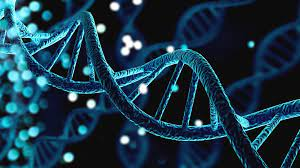

### Step 1: Initalize libraries for data analysis and visualization

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load the data

In [58]:
data=pd.read_csv('/Users/kwakim/Desktop/longevity.csv',index_col='id')
data.head()

,Association,Population,Variant(s),Gene(s),PubMed,Unnamed: 6
id,,,,,,
1,non-significant,Dutch,HLA-B40,HLA-B,1859103,NaN
2,non-significant,Dutch,HLA-DRB5,HLA-DRB5,1859103,NaN
3,non-significant,Finnish,APOB,APOB,8018664,NaN
4,significant,Finnish,APOC3,APOC3,8018664,NaN
5,significant,Finnish,E2/E3/E4,APOE,8018664,NaN


### Step 3: Filter records for genes signifaintly associated with longevity

In [80]:
sig_data=data[data['Association']=='significant']
sig_data.head()

,Association,Population,Variant(s),Gene(s),PubMed,Unnamed: 6
id,,,,,,
4,significant,Finnish,APOC3,APOC3,8018664,NaN
5,significant,Finnish,E2/E3/E4,APOE,8018664,NaN
6,significant,French,I/D,ACE,8136829,NaN
8,significant,Finnish,APOB,APOB,8155090,NaN
9,significant,Finnish,E2/E3/E4,APOE,8155090,NaN


### Step 4: Aggregate data. 
For each gene, count the number of variants associated with longevity

In [232]:
grouped_sig_data=sig_data.groupby(['Gene(s)'])[['Variant(s)']].count()
grouped_sig_data.head()

,Variant(s)
Gene(s),
ABCC4,1
ACE,12
ADA,1
"ADA,TNF",1
ADA2,1


### Step 5: Sort data based on number of variants

In [236]:
grouped_sig_data=grouped_sig_data.sort_values(by='Variant(s)',ascending=False)
grouped_sig_data.head()

,Variant(s)
Gene(s),
APOE,18
TP53,13
ACE,12
FOXO3,6
PON1,5


### Step 6: Isolate genes with more than 1 longevity-associated variant

In [237]:
plot_data=grouped_sig_data[grouped_sig_data["Variant(s)"]>1]
plot_data.tail()

,Variant(s)
Gene(s),
HFE,2
"DBT,DLD,UBE4B",2
HLA-DQA1,2
TERT,2
SERPINE1,2


### Step 7: Create a histogram to visualize the number of longevity-associated variants per gene

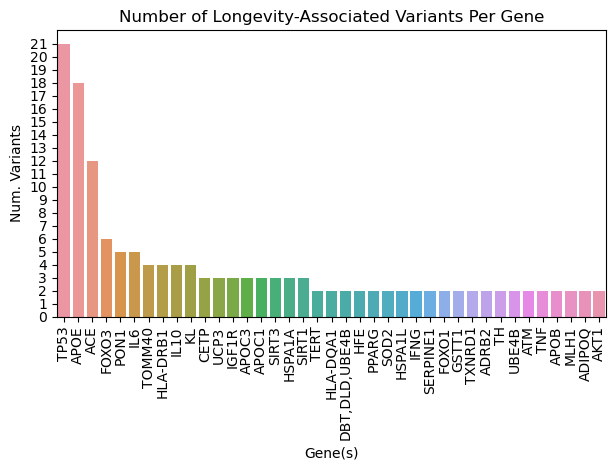

In [229]:
sns.barplot(x=plot_data.index, y="Num. Variants", data=plot_data).set(title="Number of Longevity-Associated Variants Per Gene")
plt.xticks(rotation=90);
plt.tight_layout();
plt.yticks(range(0,max(grouped_sig_data["Num. Variants"]+1)));
